# MIT xPRO
## Data Science and Big Data Analytics: Making Data-Driven Decisions Course

### Case Study 1.1.2: Finding Themes in the Project Description
The task in this study is to scrape some internet pages to collect the abstracts of scientific papers and categorize them in relevant topics.
As per the example document provided in the course, I will categorize the scraped abstracts in 5 different topics using the LDA algorithm from sklearn package.

### Module Imports

In [1]:
# Basics
import numpy as np
import pandas as pd
import random
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Load the dataset

In [2]:
# Import Challenger dataset
data = pd.read_csv("challenger-data.csv")

In [3]:
# First look at the data
data.head(5)

,Observation,Y,X
0,1,1,53
1,2,1,53
2,3,1,53
3,4,0,53
4,5,0,53


In [6]:
# Checking for missing data
data.isnull().sum()

Observation    0
Y              0
X              0
dtype: int64

### Data Visualization

In [39]:
# Splitting the dataset in two subsets for visualization
failures = data[data.Y == 1]
success = data[data.Y == 0]

In [43]:
# Counts of values of failures for each temperature
failures_freq = failures.X.value_counts()
failures_freq

53    3
75    2
70    2
63    1
58    1
57    1
Name: X, dtype: int64

In [44]:
no_failures_freq = success.X.value_counts()
no_failures_freq

70    18
67    15
76    10
75     8
80     5
66     5
68     5
69     5
81     5
72     5
73     5
78     5
79     5
63     4
58     4
57     4
53     2
Name: X, dtype: int64

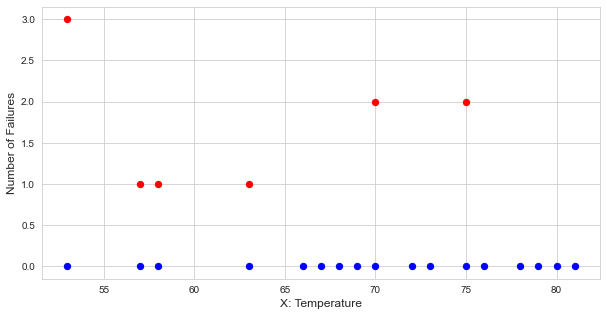

In [58]:
# Visualizing the data
plt.figure(figsize=(10,5))
plt.scatter(failures_freq.index, failures_freq, c='red', s=40)
plt.scatter(no_failures_freq.index, np.zeros(len(no_failures_freq)), c='blue', s=40)
plt.xlabel('X: Temperature', size=12)
plt.ylabel('Number of Failures', size=12)
plt.show()

In the graphic above, we can see the plot of all the temperatures where there was a success in the launch, thus Y = 0 - the blue dots.
And the red dots are the temperatures where there were failure during the launch. 

### Logistic Regression

In [60]:
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm

In [61]:
#get the data in correct format
y, X = dmatrices('Y ~ X', data, return_type = 'dataframe')

In [65]:
#build the model
logit = sm.Logit(y, X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.242411
         Iterations 7


In [74]:
# summarize the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Oct 2020   Pseudo R-squ.:                  0.1549
Time:                        17:35:23   Log-Likelihood:                -29.089
converged:                       True   LL-Null:                       -34.420
Covariance Type:            nonrobust   LLR p-value:                  0.001094
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4049      3.041      2.435      0.015       1.445      13.365
X             -0.1466      0.047     -3.104      0.002      -0.239      -0.054
==============================================================================
"""

We decrease the chance of failure in 14% for each 1 degree Farenheit increased.